In [1]:
import ROOT as ROOT
import numpy as np

from PIL import Image
from IPython.display import display

Welcome to JupyROOT 6.12/07


In [2]:
year = "2018"

In [3]:
line = ROOT.TGraph(2)
line.SetPoint(0,40,0)
line.SetPoint(1,201,0)
line.SetLineColor(2)
line.SetLineWidth(4)

In [4]:
def draw_fit(p, b, title):
    f = ROOT.TFile("output/testModel_qcdfit_"+p+"_"+year+".root")

    w = f.Get("w")
    #w.Print()
    mc = w.obj("ModelConfig")

    c = ROOT.TCanvas("c_"+p+str(b),"c_"+p+str(b),600,600)
    frame = w.var("msd").frame(23)
    ROOT.gPad.SetLeftMargin(0.15)
    
    data_pass = w.data("ptbin"+str(b)+p+"pass"+year+"_data_obs")
    data_pass.plotOn(frame, ROOT.RooFit.DataError(1),ROOT.RooFit.LineColor(1),ROOT.RooFit.MarkerColor(1))
    
    fr = w.genobj('fitresult_qcdmodel_'+p+'_simPdf_qcdmodel_'+p+'_observation')

    fit = w.pdf("ptbin"+str(b)+p+"pass"+year+"_qcd")
    fitplot = fit.plotOn(frame,ROOT.RooFit.FillColor(622),ROOT.RooFit.VisualizeError(fr))
    fitplot = fit.plotOn(frame,ROOT.RooFit.LineColor(2))

    data_pass.plotOn(frame, ROOT.RooFit.DataError(1),ROOT.RooFit.LineColor(1),ROOT.RooFit.MarkerColor(1))

    c.Draw()

    frame.SetTitle(title)
    frame.SetYTitle("Events / 7 GeV")
    frame.SetXTitle("m_{sd} [GeV]")
    frame.Draw()
    c.SaveAs('plots/MCTF_'+p+str(b)+'.png')
    c.SaveAs('plots/MCTF_'+p+str(b)+'.pdf')
    
    img = Image.open('plots/MCTF_'+p+str(b)+'.png')
    display(img)

In [5]:
def draw_fit_norm(p, b, title):
    f = ROOT.TFile("output/testModel_qcdfit_"+p+"_"+year+".root")

    w = f.Get("w")
    #w.Print()
    mc = w.obj("ModelConfig")

    data_pass = w.data("ptbin"+str(b)+p+"pass"+year+"_data_obs")
    data_fail = w.data("ptbin"+str(b)+p+"fail"+year+"_data_obs")

    c = ROOT.TCanvas("c_"+p+str(b),"c_"+p+str(b),600,600)
    frame = w.var("msd").frame(23)
    ROOT.gPad.SetLeftMargin(0.15)
    
    fr = w.genobj('fitresult_qcdmodel_'+p+'_simPdf_qcdmodel_'+p+'_observation')

    fit = w.pdf("ptbin"+str(b)+p+"pass"+year+"_qcd")
    fitplot = fit.plotOn(frame,ROOT.RooFit.FillColor(622),ROOT.RooFit.VisualizeError(fr))
    fitplot = fit.plotOn(frame,ROOT.RooFit.LineColor(2))
    #cfit = fitplot.getCurve()

    data_pass.plotOn(frame, ROOT.RooFit.Rescale(1.0/data_pass.sumEntries()), 
                      ROOT.RooFit.DataError(1),ROOT.RooFit.LineColor(1),ROOT.RooFit.MarkerColor(1))
    data_fail.plotOn(frame, ROOT.RooFit.Rescale(1.0/data_fail.sumEntries()), 
                               ROOT.RooFit.DataError(1),ROOT.RooFit.LineColor(4),ROOT.RooFit.MarkerColor(4))

    c.Draw()
    frame.SetMaximum(0.3)
    frame.SetMinimum(0)
    frame.SetTitle(title)
    frame.SetYTitle("Events / 7 GeV")
    frame.SetXTitle("m_{sd} [GeV]")
    frame.Draw()
    c.SaveAs('plots/MCTF_'+p+str(b)+'.png')
    c.SaveAs('plots/MCTF_'+p+str(b)+'.pdf')
    
    img = Image.open('plots/MCTF_'+p+str(b)+'.png')
    display(img)

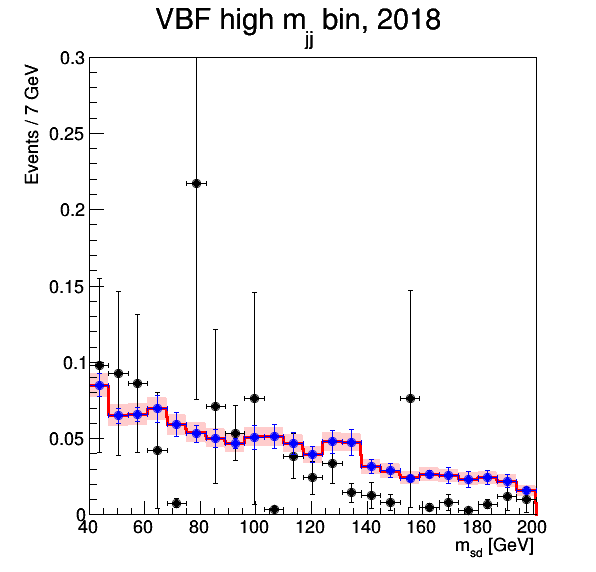

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 376.959 will supercede previous event count of 1 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 66909.6 will supercede previous event count of 376.959 for normalization of PDF projections


Info in <TCanvas::Print>: png file plots/MCTF_vbfhi0.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_vbfhi0.pdf has been created


In [6]:
draw_fit_norm("vbfhi",0,"VBF high m_{jj} bin, "+year)

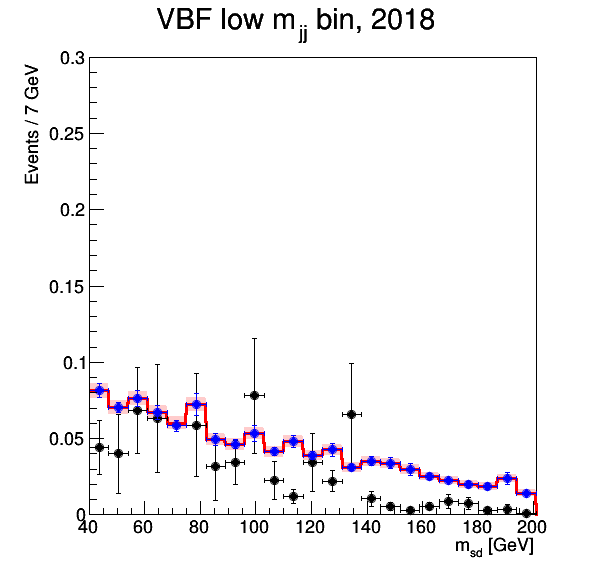

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 981.802 will supercede previous event count of 1 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 193688 will supercede previous event count of 981.802 for normalization of PDF projections


Info in <TCanvas::Print>: png file plots/MCTF_vbflo0.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_vbflo0.pdf has been created


In [7]:
draw_fit_norm("vbflo",0,"VBF low m_{jj} bin, "+year)

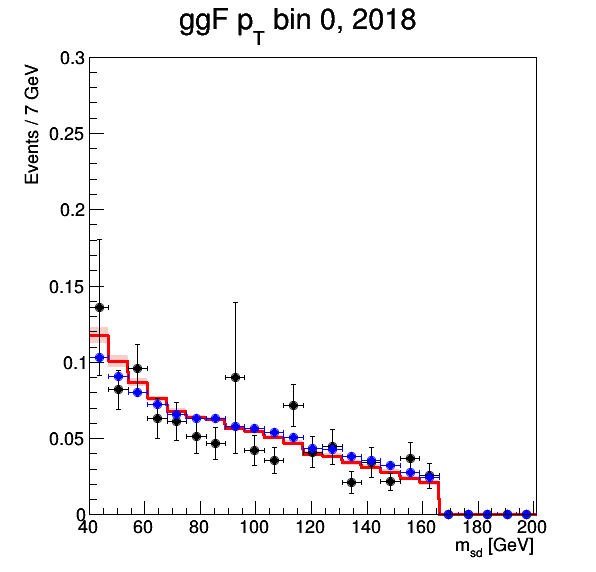

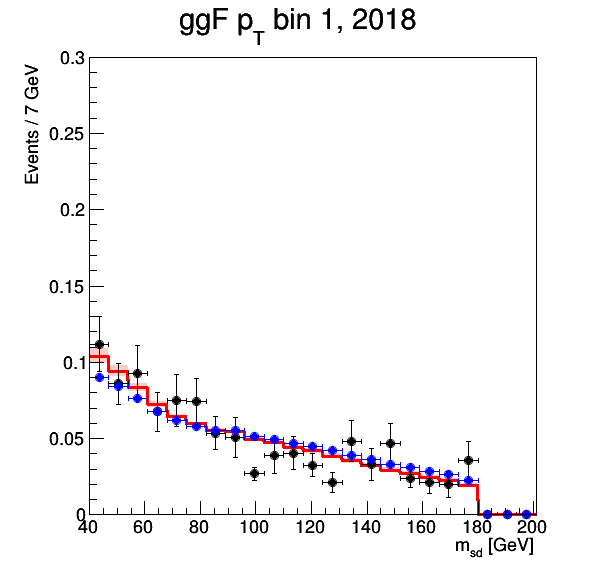

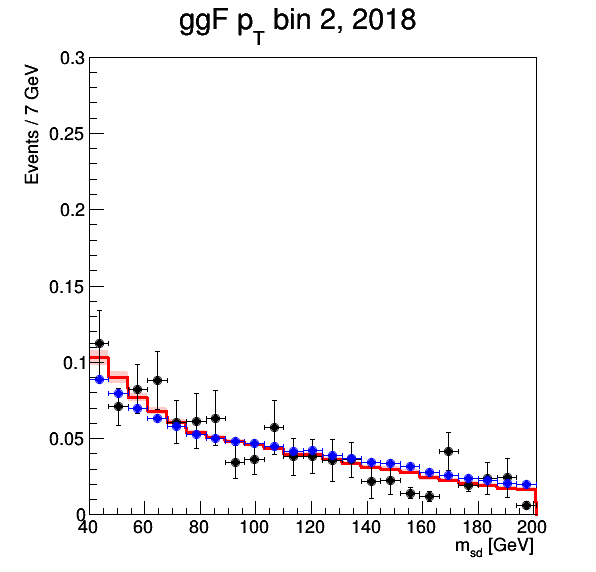

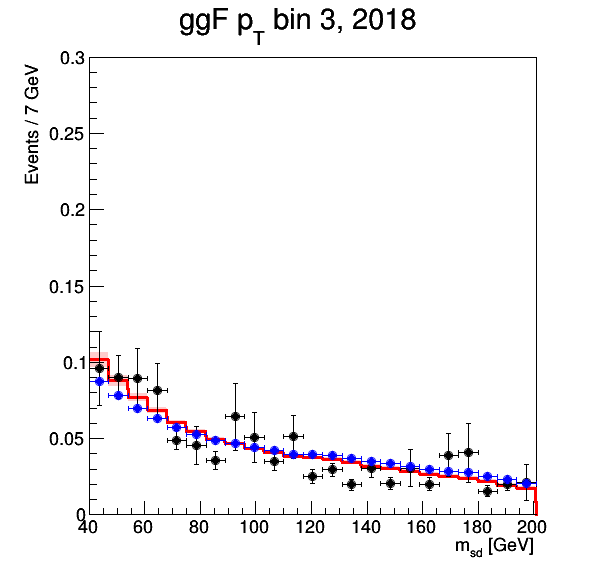

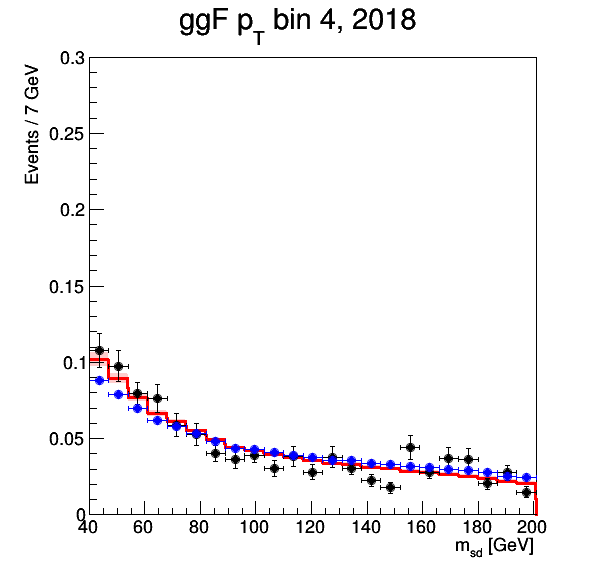

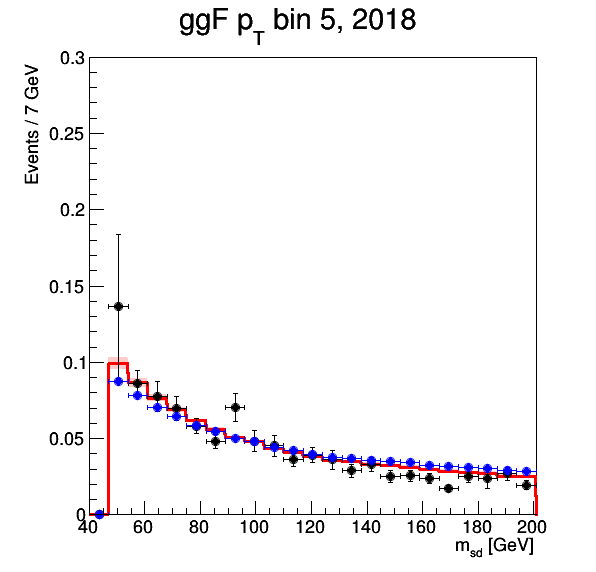

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 6331.63 will supercede previous event count of 1 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 2.10714e+06 will supercede previous event count of 6331.63 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 3360.19 will supercede previous event count of 1 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 1.17569e+06 will supercede previous event count of 3360.19 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 2154.83 will supercede previous event count of 1 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 676365 will supercede previous event count of 2154.83 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFi

Info in <TCanvas::Print>: png file plots/MCTF_ggf0.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_ggf0.pdf has been created
Info in <TCanvas::Print>: png file plots/MCTF_ggf1.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_ggf1.pdf has been created
Info in <TCanvas::Print>: png file plots/MCTF_ggf2.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_ggf2.pdf has been created
Info in <TCanvas::Print>: png file plots/MCTF_ggf3.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_ggf3.pdf has been created
Info in <TCanvas::Print>: png file plots/MCTF_ggf4.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_ggf4.pdf has been created
Info in <TCanvas::Print>: png file plots/MCTF_ggf5.png has been created
Info in <TCanvas::Print>: pdf file plots/MCTF_ggf5.pdf has been created


In [8]:
for i in range(0,6):
    draw_fit_norm("ggf",i,"ggF p_{T} bin "+str(i)+", "+year)